In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
!pip install easyocr
!pip install imutils
!pip install opencv-python.headless==4.1.2.30
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

ERROR: Could not find a version that satisfies the requirement opencv-python.headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78)
ERROR: No matching distribution found for opencv-python.headless==4.1.2.30
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import easyocr

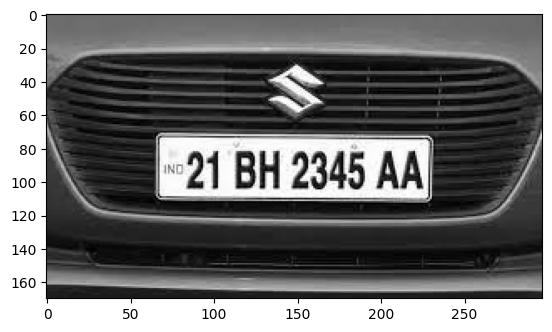

In [4]:
img = cv2.imread('/content/plate4.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

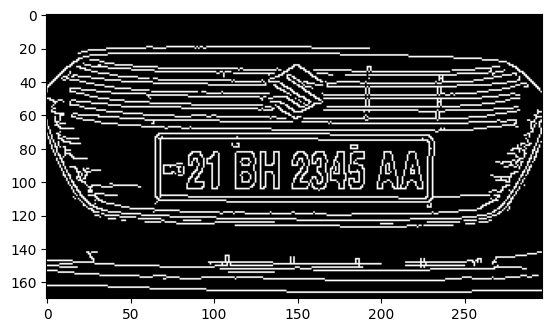

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[ 68,  75]],

       [[227,  75]],

       [[228, 108]],

       [[ 69, 108]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)

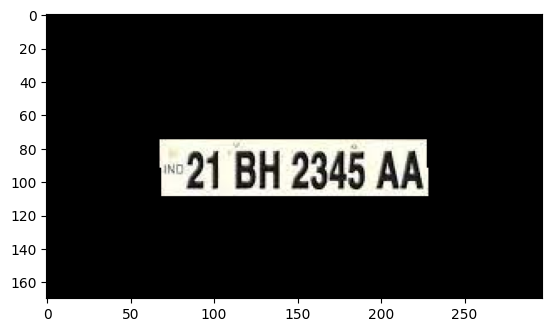

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x, y)= np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

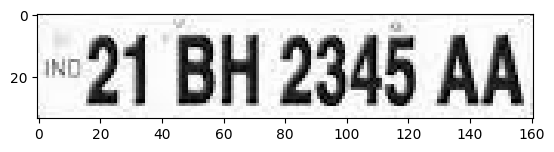

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result



[([[11, 1], [161, 1], [161, 34], [11, 34]],
  '21 BH 2345 AA',
  0.7191464660439942)]

In [14]:
txt = text = textf = txt1 = text1 = textf1 = fresult = ''

if len(result) == 1:
  txt = result[0][-1]
  text = result[0][-2]
  textf = text.replace('.', '')
  textf = textf.replace(" ", "")

if len(result) > 1:
  txt1 = result[1][-1]
  text1 = result[1][-2]
  textf1 = text1.replace(".", "")
  textf1 = textf1.replace(" ", "")

if len(textf) in range(9,11) :
    fresult = textf
    print(fresult)
elif len(textf1) in range(9,11):
     fresult = textf1
     print(fresult)

else:
  print('Please upload another Image!!!')

21BH2345AA
